In [1]:
from IPython.html.services.config import ConfigManager
from IPython.utils.path import locate_profile
cm = ConfigManager(profile_dir=locate_profile(get_ipython().profile))
cm.update('livereveal', {
              'theme': 'sky',
              'transition': 'zoom',
              'start_slideshow_at': 'selected',
})

{u'start_slideshow_at': 'selected', u'theme': 'sky', u'transition': 'zoom'}

#Lecture 10. Integral equations: discretization

## Previous lecture 
- Introduction into the integral equations: the basic one, the concept of non-locality
- Exterior and interior problems


## Todays lecture
- How to discretize: method of moments (MoM) and the Galerkin method
- Computation of the singular integrals and exponential sums
- Fast methods: the idea of the Barnes-Hut method

## Books
Books on integral equations

- [Integral equation methods in scattering theory, D. Colton R. Kress](https://www.google.com/books?hl=ru&lr=&id=Z9qmAgAAQBAJ&oi=fnd&pg=PR1&dq=Colton+Kress+integral+equation&ots=0H3pcRZBUs&sig=0RzExxkaSor_Sv9Ss7HIX3cd864) 
- Sauter, Schwab, Boundary element methods (2011)

## Method of moments (collocation method)
Recall the basic integral equation from electrostatics:

$$\int_{\Omega} \frac{q(y) dy}{\Vert x - y \Vert} = f(x).$$

1. First we mesh the domain in simplices.
2. Then, we introduce the discrete **solution space** (piecewise-linear, piecewise-constant functions).
3. Then, we approximate the solution as a linear combination of the basis functions
  $$ q(y) = \sum_i q_i \phi_i(y).$$

## MoM (continued)
Then, we get the system of equations
$$
     f(x) = \sum_i q_i \int_{\Pi_i} \frac{\phi_i}{\Vert x - y \Vert } dy.
$$
The <font color='red'> method of moments </font> is obtained by the selection of <font color='red'>
</font> collocation points (aka staggerred grids), typically in the middle of triangles/rectangles

## Piecewise-constant basis functions

For a piecewise constant basis functions, we have

$$\int_{\Pi} \frac{1}{\Vert x - y \Vert} dy, $$

where this is a two-dimensional integral.

## Computing the simplest integral
We can actually compute the anti-derivative of the integral in question, but taking successive integrals

$$
   \frac{1}{\sqrt{x^2 + y^2}}
$$

\begin{equation}
\begin{split}
F(x, y) = \int \int \frac{1}{\sqrt{x^2 + y^2}} dx dy = \\
-y + 
y \log(x + \sqrt{x^2 + y^2}) + x \log(y + \sqrt{x^2 + y^2}),
\end{split}
\end{equation}

and the final integral is just 
$$
   I(x_0, y_0, x_1, y_1) = F(x_0, y_0) + F(x_1, y_1) - F(x_0, y_1) - F(x_1, y_0),
$$

(generalization of the Newton-Leibniz formula)

In [ ]:
import sympy
from sympy import Symbol, sqrt
x = Symbol('x', real=True)
a = Symbol('a', real=True)
y = Symbol('y', real=True)
b = Symbol('b', real=True)
r = sqrt(x ** 2 + y ** 2)
sympy.init_printing()
z = sympy.integrate(1/r, x, conds='none')
print z

## Nystrom method
A Nystrom method is a popular choice: replace the integral by <font color='red'> quadrature </font>  

probably by the simplest one: the rectangle formula, 

which in 1D has the form

$$I(f) = \sum_{k=0}^n w_k f(x_k), $$

where $x_k$ is the uniform grid on the interval, $w_0 = w_n = h/2, \quad w_k = h$ for all other $k$.

## For our equation, it looks like

  $$A_{ij} = \frac{1} {\Vert x_i - y_j \Vert} h^2,$$
  
  the set $x_i$ can be called <font color='red'> receivers </font> and the set $y_j$ can be called <font color='red'> sources </font>;
  
  A typical way is to shift the grid by half-step, i.e. in 1D it will be
  
  $$
  A_{ij} = \frac{1}{|i-j| + \frac{1}{2}}.
  $$
  By the way, do you remember, what is the rank of this matrix?

## Galerkin method
1. Collocation method gives non-symmetric matrices, even if the original operator was symmetric;
2. Nystrom method adds logarithmic factor into the accuracy estimate
3. Galerkin method is the method of choice in many cases

## Galerkin method 
A Galerkin method is defined for an arbitrary linear (and even non-linear) equations

$$
    A u = f, 
$$

you select the <font color='red'> test space </font> and <font color='red'> trial space </font>. 

For simplicity, let them be equal,

i.e. 
$$
   u = \sum_i u_i \phi_i,
$$

and 

$$A_{ij} = (A \phi_i, \phi_j) $$


## Integrals in the Galerkin method
We have to compute 4D integrals (here it is written for piecewise-constant functions)

$$
  A_{ij} = \int_{\Omega_i} \int_{\Omega_j}\frac{1}{\Vert x - y \Vert} dx dy
$$
Analytic expression are cumbersome!


## Semi-numerical method
You can be **a little bit** smarter: approximate $1/r$ by something that can be well-integrated.  

By a sum of separable functions!

$$\frac{1}{\Vert x - y\Vert } \approx \sum_{\alpha=1}^r u_{\alpha}(x) u_{\alpha}(y)$$

We have used the symmetry.

But how to compute these functions $u_{\alpha}$?  (why it is useful?)


## Exponential sums

There is an identity:

$$\frac{1}{\sqrt{x}} = \frac{1}{\sqrt{\pi}} \int^{\infty}_0 \frac{e^{-px}}{\sqrt{p}} dp.$$

It can be very useful in separating variables.


## A quadrature

Suppose we have a quadrature for the integral:

$$ \frac{1}{\sqrt{x}} = \frac{1}{\sqrt{\pi}} \int^{\infty}_0 \frac{e^{-px}}{\sqrt{p}} dp. \approx \sum_{k} w_k e^{-p_k x}.$$

Then put 

$$x := x^2 + y^2$$

and we get the sum of <font color='red'> Gaussians </font> on the right.

## Sum of Gaussians

$$\frac{1}{r} \approx \sum_{k} w_k e^{-p_k (x^2 + y^2)},$$

and the integrals reduce to the 1D integrals

$$
   \int_a^b e^{-p_k x^2} dx, 
$$

and this can be expressed via the <font color='red'> Error functions </font> (and there is a standard numpy erfc function)

## But who you can approximate?

We reduced the problem to the problem of creating a good quadrature rule for the integral

$$\int^{\infty}_0 \frac{e^{-px}}{\sqrt{p}} dp$$

You have to do the $p = e^t$ (why do we do so?) and we the new integral

$$
\int^{\infty}_{-\infty} e^{-e^{t} x + t/2} dt
$$

and this integral is then approximate by **trapezoidal rule** $t_k = a_t + k h_t, \quad h_t = (b_t - a_t)/K$


The integral is doubly exponentially decaying, and also its Fourier transform is decaying exponentially fast.

Thus, trapezoidal rule has exponential convergence in this setting

A short demo...

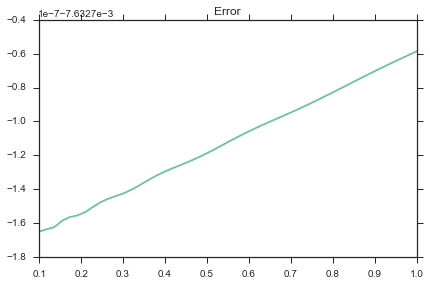

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', palette='Set2')
sns.despine()
%matplotlib inline
a = -10
b = 20
n = 70
t = np.linspace(a, b, n)
h = t[1] - t[0]
w = np.ones(n) * h
w[0] = h/2
w[n-1] = h/2
w = w * np.exp(0.5 * t)/np.sqrt(math.pi)
ps = np.exp(t)
x = np.linspace(0.1, 1)
fun = 1.0/np.sqrt(x)
appr = 0 * x
for i in xrange(n):
    appr = appr + w[i] * np.exp(-(x) * ps[i])
#plt.plot(x, fun)
ax = plt.subplot(1, 1, 1)
ax.plot(x, appr - fun)
#ax.set_title('Approximation error by %d Gaussians' % n)
ax.set_title('Error')
plt.tight_layout(.8)

## A sidenote about fitting by sum of exponentials
- Approximation of a given function by a sum of exponentials is a ill-posed problem
- Original method by Prony (1795)
- Recent work by [G. Beylkin, et. al, Approximation by exponential sums revisited](https://www.google.ru/url?sa=t&rct=j&q=&esrc=s&source=web&cd=2&cad=rja&uact=8&ved=0CCYQFjAB&url=http%3A%2F%2Famath.colorado.edu%2Fpub%2Fwavelets%2Fpapers%2FBEY-MON-2010.pdf&ei=Cok1VZHkJKLnygO7hYCgBw&usg=AFQjCNGRcxece5lCuy9N7oheTBOzOpcSYw&sig2=Rf3DPGBAMmYO4parmQXzFQ&bvm=bv.91071109,d.bGQ) 

## Efficient quadratures (papers)
- C. Schwab,  S. Sauter [Efficient automatic quadrature in 3-d Galerkin BEM](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.45.4312&rep=rep1&type=pdf)
- A. Polimeridis, Traianos V Yioultsis [On the direct evaluation of weakly singular integrals in Galerkin mixed potential integral equation formulations](http://ieeexplore.ieee.org/xpls/abs_all.jsp?arnumber=4618709)

## Green functions and fundamental solutions

Terminology:
- A fundamental solution is a "point charge" in free space: no boundary conditions
- Green function can be for the boundary conditions/layered media/etc. (i.e. "inverse" of the differential operator)

## Fundamental solution: Helmholtz
The Helmholtz equation has the form

$$\Delta u + k^2 u = f,$$

and it describes the propagation of <font color='red'> scalar waves </font> (acoustic wave).  

$k$ is called **wavenumber**.

The fundamental solution (the one that gives $\delta$-function after the application of the operator)  has the form

$$K(r) = \frac{\exp(i k r)}{r}.$$

So it oscillates.

## Laplace in 2D

What is the fundamental solution to the Laplace equation in 2D?

$$G(x, y) = \log \Vert x - y \Vert.$$

It plays a role in the theory of <font color='red'> conformal mappings </font>

Helmholtz in 2D is solved by the <font color='red'> Hankel function </font>

## Stokes problem
Stokes equation define the laminar flow in low Reynolds number regime:

\begin{equation}
\begin{split}
- \nabla p + \mu \Delta v = -F \delta(r) \\
 \nabla \cdot p = 0
\end{split}
\end{equation}


## Maxwell equations

$$
\begin{split}
\nabla \times H = \frac{\partial D}{\partial t} + J, \\\quad \nabla \times E = -\frac{\partial B}{\partial t}, \quad \nabla \cdot D =  \rho, \quad \nabla \cdot B = 0. \\
D = \varepsilon E, \quad H = \mu B.
\end{split}
$$

## How to make it fast

The memory is $\mathcal{O}(N^2)$, the complexity is $\mathcal{O}(N^3)$.  

Need to make it $\mathcal{O}(N \log N)$ both in memory and complexity of matrix-by-vector product.

## Matrix structure
The integral operator matrix:

1. Matrix is dense
2. Matrix is not of low-rank
3. Some blocks are of low rank!

A demo

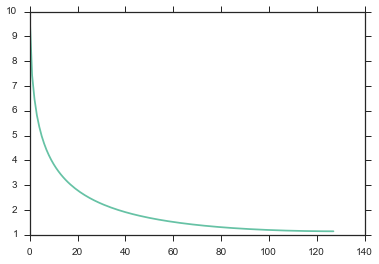

In [7]:
import numpy as np
import matplotlib.pyplot as plt
n = 128
a = [[1.0/(abs(i - j) + 0.5) for i in xrange(n)] for j in xrange(n)]
a = np.array(a)



plt.plot(np.linalg.svd(a)[1])

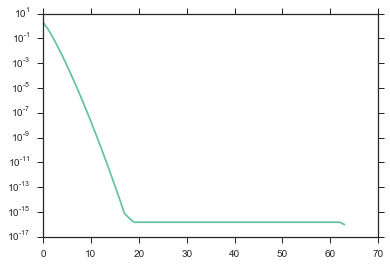

In [8]:
#And for a block:
plt.semilogy(np.linalg.svd(a[:n/2, n/2:])[1])

## Off-diagonal blocks correspond to "far" interaction

$$y_i = \sum_{j} a_{ij} q_j,$$

and the sources are separated from the receivers. 

This gives a hint: separated geometrically -- low-rank property.

## Geometric separability and low rank


For $\frac{1}{r}$ we can have the exponential sums to separate variables, if $r > r_0$. 

What happens, if $r_0$ goes to zero?

The separability property vanishes!

## One-dimensional case


$$A = \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22}\end{bmatrix},$$

where $A_{12}$ and $A_{21}$ correspond to the "far" interaction, and are of low-rank.

Remember, that a low-rank matrix can be factored as 

$$A = U V^{\top},$$

where $U$ is $n \times r$, $V$ is $m \times r$, 

## Memory estimate

Thus we have 

$$Memory(n) = 2 Memory(n/2) + 2 n/2 r$$

and that gives 

$Memory(n) = 2 n/2 * r + 4 n/4 * r + \ldots = \mathcal{O}( n \log n)$

Similar estimates hold for the matrix-by-vector product procedure (why do we care about that?)

## Two-dimensional case
In two dimension, the splitting is different.

In [10]:
from numba import jit
n = 32
t = np.linspace(0, 1, n)
h = t[1] - t[0]
x_src, y_src  = np.meshgrid(t, t)
x_src, y_src = x_src.flatten(), y_src.flatten()
x_rec, y_rec = x_src + h * 0.5, y_src + 0.5 * h
N = n * n
mat = np.zeros((N, N))
@jit(nopython=True)
def compute_mat(mat, x_src, y_src, x_rec, y_rec):
    for i in range(N):
        for j in xrange(N):
            r = (x_src[i] - x_rec[j]) ** 2 + (y_src[i] - y_rec[j]) ** 2
            mat[i, j] = 1.0/np.sqrt(r)
            
 

%timeit compute_mat(mat, x_src, y_src, x_rec, y_rec)
#(x_rec - x_src)/h

The slowest run took 20.23 times longer than the fastest. This could mean that an intermediate result is being cached 
100 loops, best of 3: 9.62 ms per loop


Plotting the singular values of the off-diagonal block shows that they do not decay that fast.  

Why? Because they correspond to the non-separated sets of sources and receivers.

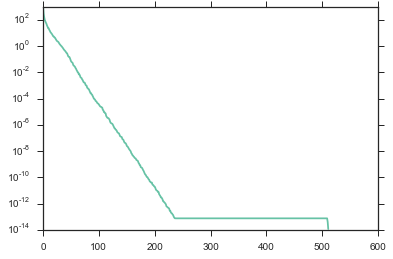

In [11]:
plt.semilogy(np.linalg.svd(mat[:N/2, N/2:])[1])

## The general scheme
- Construct **trees** for the sources and receivers
- Check the sets for geometric separability.
- If they are not separated, call the recursion
- Otherwise, do low-rank approximation.

This is the basis for the **Barnes-Hut** method (original work in astronomy)  

and the preliminary approach to the <font color='red'> Fast Multipole Method </font>, proposed by Greengard and Rokhlin

In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/alex.css", "r").read()
    return HTML(styles)
css_styling()